In [49]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from collections import Counter

from dataclasses import dataclass
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D

from sklearn.model_selection import train_test_split
from scipy.stats import norm


from tensorflow import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE
from collections import Counter

In [4]:
df = pd.read_csv('https://github.com/baridamm/OnlineShoppers_Purchasing_Intention/blob/main/online_shoppers_intention.csv?raw=true')

In [5]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


17 features and 1 target variable Rvenue

In [6]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

We can see that there are no null values

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [8]:
df.shape

(12330, 18)

12330 observations

# Exploratory Data Analysis

In [9]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


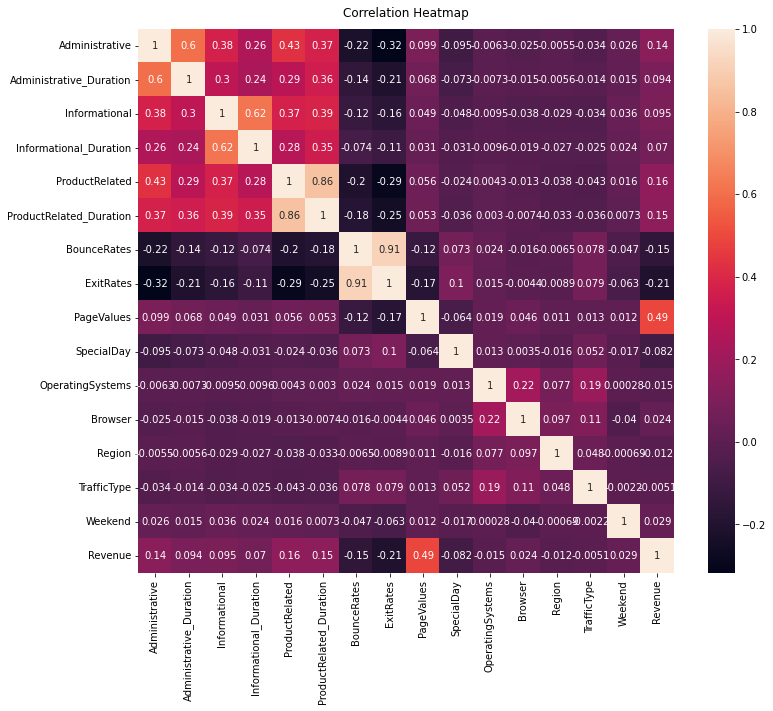

In [10]:
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(df.corr(), annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

The correlation between only two sets of variables is greater than 0.8. 

BounceRates, ExitRates.

ProductRelated, ProductRelated_Duration

We can show this correlation with scatter plots.

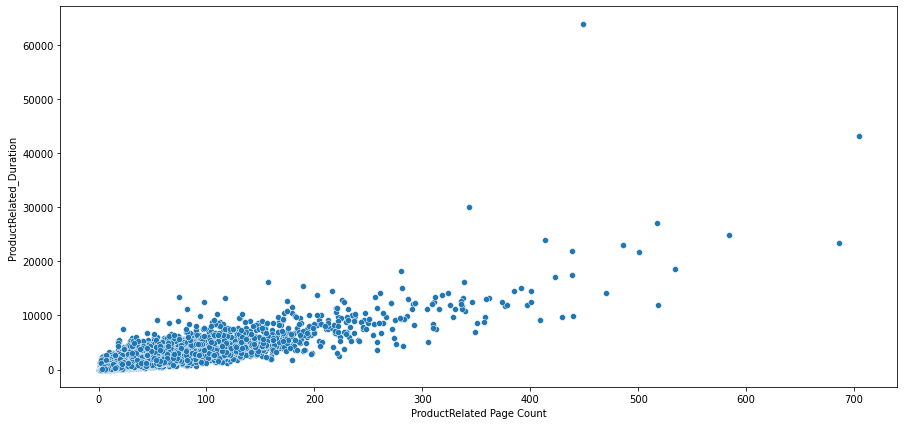

In [11]:
plt.figure(figsize=(15,7))
sns.scatterplot(x='ProductRelated',y='ProductRelated_Duration',data=df)
plt.xlabel('ProductRelated Page Count')
plt.show()

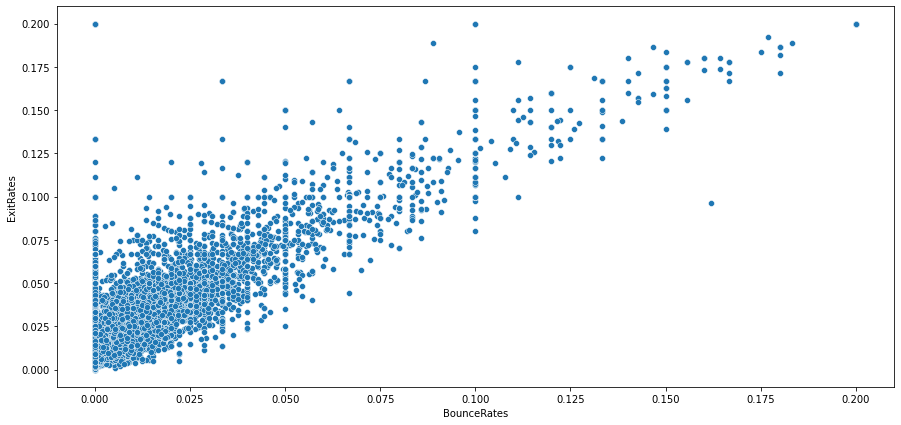

In [12]:
plt.figure(figsize=(15,7))
sns.scatterplot(x='BounceRates',y='ExitRates',data=df)
plt.show()

To avoid these we can combine or remove the correlated features and create new fetures.

We will create 3 new features out of Informational, Administrative and product related categories and remove the bounce rate feature.

In [13]:
df['avg_dur_administrative'] = df['Administrative_Duration'] / (df['Administrative'] + 0.00001)
df['avg_dur_informational'] = df['Informational_Duration'] / (df['Informational'] + 0.00001)
df['avg_dur_product'] = df['ProductRelated_Duration'] / (df['ProductRelated'] + 0.00001)

In [14]:
new_columns = ['avg_dur_administrative','avg_dur_informational','avg_dur_product', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue']
df_new = df[new_columns]       

In [15]:
df_new.head()

,avg_dur_administrative,avg_dur_informational,avg_dur_product,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.000000,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,31.999840,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,0.0,0.000000,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,1.333327,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,62.749937,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


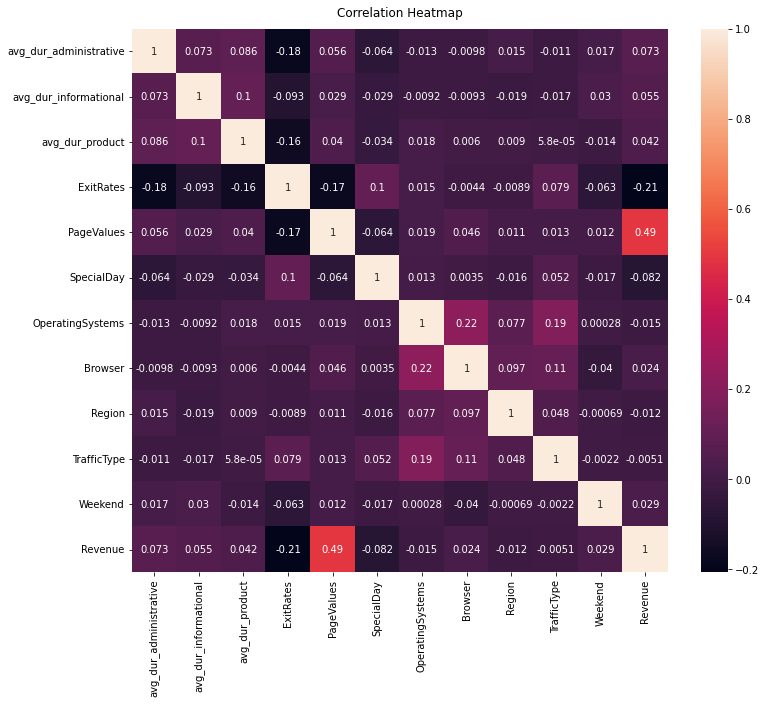

In [16]:
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(df_new.corr(), annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

We can see that the highly correlated variables are removed. 
Also, we remove 4 other features. Operating System, Browser, Region and Traffic Type as they seem to not have a impact on Revenue.

To support this assumption we create boxplots to see the distribution of these predictors by revenue.

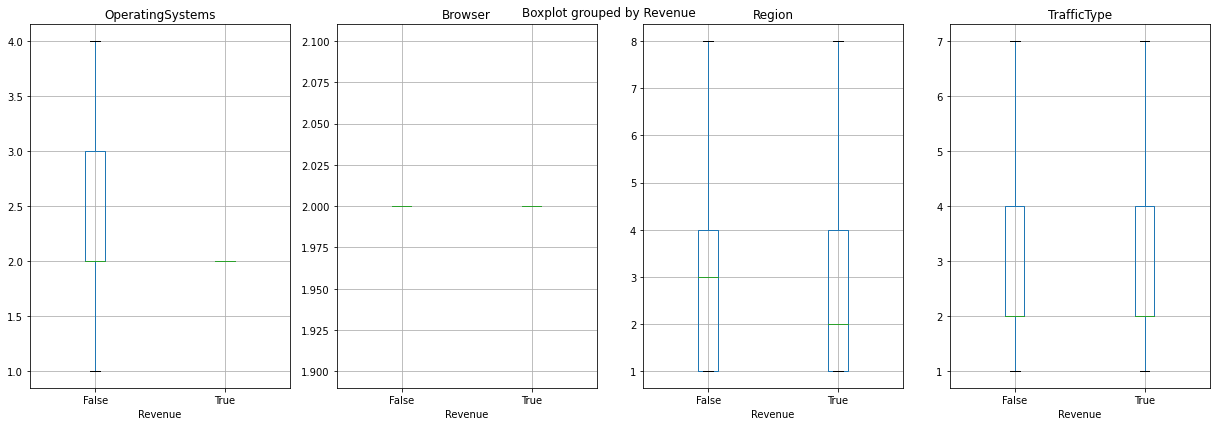

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(17,6))
df_new.boxplot(column = 'OperatingSystems', by = 'Revenue', ax=axes[0], showfliers=False)
df_new.boxplot(column = 'Browser', by = 'Revenue', ax=axes[1], showfliers=False)
df_new.boxplot(column = 'Region', by = 'Revenue', ax=axes[2], showfliers=False)
df_new.boxplot(column = 'TrafficType', by = 'Revenue', ax=axes[3], showfliers=False)
for ax in axes:
    ax.set_xlabel('Revenue')
plt.tight_layout() 
plt.show()

In [18]:
df_new = df_new[['avg_dur_administrative', 'avg_dur_informational', 'avg_dur_product',
       'ExitRates', 'PageValues', 'SpecialDay','Month', 'VisitorType', 'Weekend',
       'Revenue']]

**Target**

The target variable is Revenue wich illustrates if a session ends up with the customer shopping or not. Most sessions end without shopping.

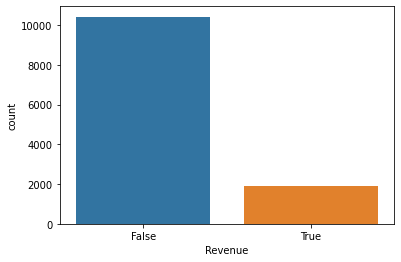

In [19]:
sns.countplot(x='Revenue',data=df_new)
plt.show()

It can be seen that our data is imbalanced.

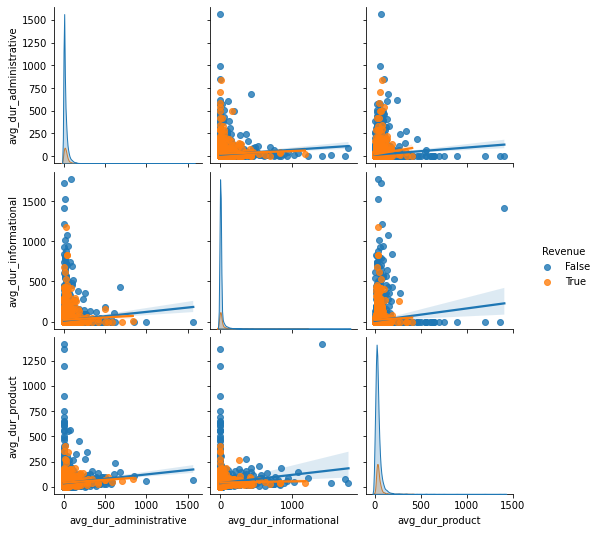

In [20]:
sns.pairplot(df.loc[:,['avg_dur_administrative','avg_dur_informational','avg_dur_product','Revenue']],hue='Revenue',kind='reg')
plt.show()

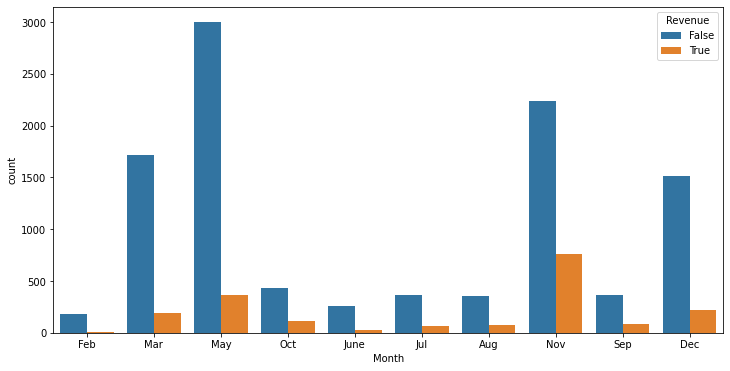

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(x= 'Month', hue='Revenue', data=df_new)
plt.show()

We can see that most sessions that end up with revenue are in November, this can be due to black friday being in November.

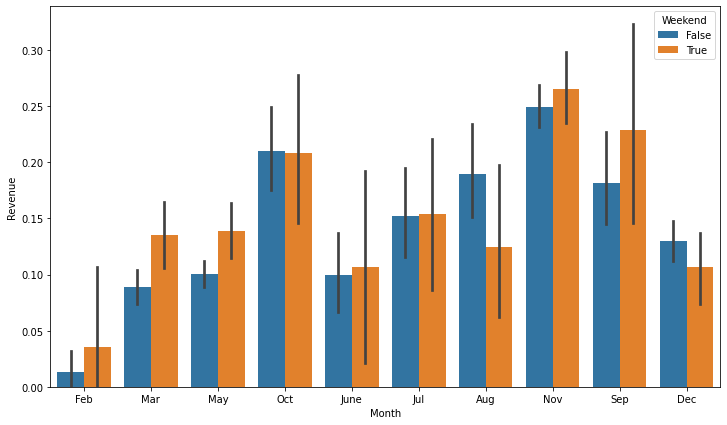

In [22]:
plt.figure(figsize=(12,7))
sns.barplot(y='Revenue',x='Month',data=df_new,hue='Weekend')
plt.show()

We can observe that the chance of earning revenue will increase on the weekends.

We move to the next step with 9 predictors and the target variable Revenue.

In [89]:
y = df_new.iloc[:, -1]

In [90]:
y = np.array(y)

In [91]:
df_model = pd.get_dummies(df_new.iloc[:, :-1], columns = ['Month', 'VisitorType',  'Weekend'])

In [92]:
df_model.head()

,avg_dur_administrative,avg_dur_informational,avg_dur_product,ExitRates,PageValues,SpecialDay,Month_Aug,Month_Dec,Month_Feb,Month_Jul,...,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
0,0.0,0.0,0.000000,0.20,0.0,0.0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
1,0.0,0.0,31.999840,0.10,0.0,0.0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
2,0.0,0.0,0.000000,0.20,0.0,0.0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
3,0.0,0.0,1.333327,0.14,0.0,0.0,0,0,1,0,...,0,0,0,0,0,0,0,1,1,0
4,0.0,0.0,62.749937,0.05,0.0,0.0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1


In [94]:
X = df_model.values

In [95]:
X.shape

(12330, 21)

In [96]:
y = [int(item) for item in y]
y = np.array(y)
y.shape

(12330,)

In [85]:
# from sklearn.preprocessing import StandardScaler
# scale = StandardScaler()

# df_X = df_model


# df_scaled = scale.fit_transform(df_X)
# df_scaled = pd.DataFrame(df_scaled)
# df_scaled.columns = df_X.columns
# df_scaled


In [97]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X)
X = scaler.transform(X)

In [98]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3)
X_dev, X_test, y_dev, y_test= train_test_split(X_test,y_test,test_size=0.3)

In [100]:
#Balancing the data set suing SMOTE
counter = Counter(y_train)
print(counter)

sm = SMOTE(random_state = 2, sampling_strategy=0.8)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)



counter = Counter(y_train_res)
print(counter)

Counter({0: 7291, 1: 1340})
Counter({0: 7291, 1: 5832})


# Model Selection

**Converting categorical into numerical**

We have 3 categorical predictors.

# Logistic Regression

We do the slpit outside the model for this project. This can be done inside the model too.

In [61]:
from scipy.special import expit, logit

In [101]:
@dataclass
class LogisticsRegression:

  X_train:np.matrix
  y_train:np.array
  X_dev:np.matrix
  y_dev:np.array
  X_test:np.matrix
  y_test:np.array
  maxIteration: int
  learningRate: float
  epsilon: float
  lam: float
  treshhold : float


  def __post_init__(self):

    #self.dataSplit(self.X,self.y)
    self.X_train = self.addX0(self.X_train)
    self.X_dev = self.addX0(self.X_dev)
    self.X_test = self.addX0(self.X_test)

    
  def normalize(self, X):
        mean = np.mean(X, 0)
        std = np.std(X, 0)
        
        X_norm = (X-mean) / std
        X_norm = self.addX0(X_norm)
        return X_norm, mean, std
    
    
  def normalizeTestData(self, X, train_mean, train_std):
        X_norm = (X - train_mean) / train_std
        X_norm = self.addX0(X_norm)
        return X_norm
  
  def addX0(self, X):
    
    return np.column_stack([np.ones(X.shape[0]), X])



  def dataSplit(self,X,y):

    self.X_train,self.X_test,self.y_train,self.y_test=train_test_split(X,y,test_size=0.3, random_state=1)
    self.X_dev, self.X_test, self.y_dev ,self.y_test = train_test_split(self.X_test, self.y_test, test_size=0.3, random_state=1)

  def remove_index(self, X):

    X = np.delete(X, self.r, 0)

    return X
  
  def sigmoid(self, x):
    """
    Parameters:
    x: input value(s)
    return
    Scalar or array corresponding to x passed through the sigmoid function
    """
    h=np.e** (-1 * x)
    return 1 / (1 + h)

  def predict(self, X):

    return X.dot(self.w)

  def costFunction(self, X, y):
    #log loss
    #sig = self.sigmoid(self.predict(X))
    sig = expit(self.predict(X))
    loss = y.dot(np.log(sig)) + (1-y).dot(np.log(1-sig))
    #print(loss)
    cost = (1/X.shape[0]) * (-loss.sum()) + (self.lam/2) * ((self.w**2).sum()) * 1/X.shape[0]
    #print(cost)

    #second approach
    sig = X.dot(self.w)
    #cost = (np.log(np.ones(X.shape[0]) + np.exp(sig)) - y.dot(sig)).sum()
    return cost

  def costDerivate(self, X, y):

    #sig = self.sigmoid(self.predict(X))
    sig = expit(self.predict(X))
    grad =  (sig- y).dot(X) + 2*self.lam*self.w
    return grad

  def gradientDescent(self, X, y):

     errors = []
     last = float('inf')

     for i in tqdm(range(self.maxIteration)): 
      
       self.w = self.w - self.learningRate * self.costDerivate(X,y)
       current = self.costFunction(X,y) 

       errors.append(current) 

       diff = abs(last- current)
       last = current

       if diff < self.epsilon:
         print("The model stopped learning")
         break

     self.plot_cost(errors) 
  
  def plot_cost(self, cost_sequence):


    s = np.array(cost_sequence)  
    t =  np.arange(s.size) 

    fig, ax = plt.subplots()
    ax.plot(t,s)

    ax.set(xlabel= "iterations", ylabel= "cost", title = "cost_trend")
    ax.grid()
    plt.legend(bbox_to_anchor=(1.05,1), loc=2, shadow=True)
    plt.show()

  def evaluate(self, y, y_hat):



    y = (y==1)
    y_hat = (y_hat==1)


    precision = (y & y_hat).sum() / y_hat.sum()
    recall = ((y & y_hat).sum() / y.sum())
    f_score = 2* precision * recall / (precision + recall)
    return f_score, precision, recall


  def accuracy(self, y, y_hat):

    sum=0

    for i in range(len(y)):
      if y[i]==y_hat[i]:
        sum+=1

    return sum/len(y)    


  def test_set(self):

    return self.X_test, self.y_test, self.y_hat_test
 
  def plot_dist(self, y, y_hat):
    y_hat_1 = y_hat[y==1]
    y_hat_0 = y_hat[y==0]
    #plt.hist([y_hat_1, y_hat_0], label=['1, 0'], bins=50, alpha=0.8)
    #plt.legend(loc='upper right')
    #plt.show()
    #plt.xlabel("Predicted probability distribution")

    sns.distplot(y_hat_1, hist=False, rug=True)
    sns.distplot(y_hat_0, hist=False, rug=True)

    plt.show()


  def fit(self):

    #We fit the model twice one with all the observations and once with removing
    #two observations
    #First we fit the model without removing the observations to compare the 
    #difference

    
    self.w = np.ones([self.X_train.shape[1]], dtype=np.float64)

    #self.X_train ,mean ,std = self.normalize(self.X_train)
    #self.X_test = self.normalizeTestData(self.X_test, mean, std)
    #self.X_dev = self.normalizeTestData(self.X_dev, mean, std)

    self.gradientDescent(self.X_train, self.y_train)

    print("\nThe weights are", self.w)

    #plotting without removing 1 and 39
    #self.plot()
    #self.scatterPlt()


    y_hat = self.sigmoid(self.predict(self.X_train))
    print(max(y_hat))
    y_hat_dev = self.sigmoid(self.predict(self.X_dev))
    self.y_hat_test = self.sigmoid(self.predict(self.X_test))
    self.plot_dist(self.y_dev, y_hat_dev)


    for i in range(len(y_hat)):

      if y_hat[i] > self.treshhold:
    
        
        y_hat[i] = 1
      
      else:

        y_hat[i] =0  

    for i in range(len(y_hat_dev)):

      if y_hat_dev[i] > self.treshhold:
    
        
        y_hat_dev[i] = 1
      
      else:

        y_hat_dev[i] =0

    for i in range(len(self.y_hat_test)):

      if self.y_hat_test[i] > self.treshhold:
    
        
        self.y_hat_test[i] = 1
      
      else:

        self.y_hat_test[i] =0

        # y_hat = np.around(y_hat)
        # self.y_hat_test = np.around(self.y_hat_test)
        # y_hat_dev = np.around(y_hat_dev)


    f_score, precision, recall = self.evaluate(self.y_train, y_hat)
    f_score_dev, precision_dev, recall_dev = self.evaluate(self.y_dev, y_hat_dev)
    #f_score_test, precision_test, recall_test = self.evaluate(self.y_test, y_hat_test)
    print("f1-score for train set: {}".format(f_score, precision, recall))
    print("f1-score for development set: {}".format(f_score_dev, precision_dev, recall_dev))
    print("precision for development set:", precision_dev)
    print("recall for development set:", recall_dev)

    #print("fq-score for test set was {}".format(f_score_test, precision_test, recall_test))

    print("accurcy for train set:", self.accuracy(self.y_train, y_hat))
    print("accurcy fro development set:", self.accuracy(self.y_dev, y_hat_dev))




In [63]:

def accuracy(y, y_hat):

  sum=0

  for i in range(len(y)):
    if y[i]==y_hat[i]:
      sum+=1

  return sum/len(y) 

In [64]:
def score(y, y_hat):



  y = (y==1)
  y_hat = (y_hat==1)


  precision = (y & y_hat).sum() / y_hat.sum()
  recall = ((y & y_hat).sum() / y.sum())
  f_score = 2* precision * recall / (precision + recall)
  return f_score, precision, recall

Best Logistic Regression model

In [102]:
lr = LogisticsRegression(X_train_res
                         , y_train_res, X_dev, y_dev, X_test, y_test, 
                         maxIteration= 5000, learningRate=.00005,
                         epsilon=0.0001, lam=0.0001, treshhold=0.6)

100%|██████████| 5000/5000 [00:16<00:00, 303.65it/s]


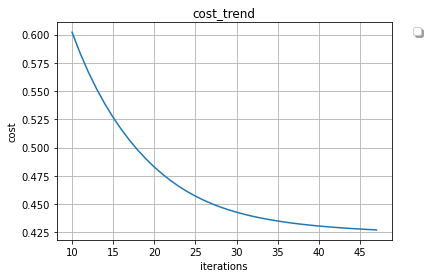


The weights are [-0.9855471   0.00671938  0.07057947  0.01690125 -1.15068941  2.16541757
 -0.04246592  0.63884225  1.00943147  0.14807852  0.70353379  0.48195772
  0.97379733  1.19697423  1.80925442  0.67633812  0.68183121  1.08150398
  0.17787937  1.11362948  0.9886095   1.0112905 ]
1.0


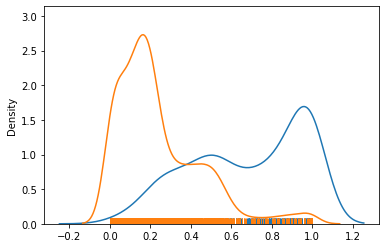

f1-score for train set: 0.7283648951333742
f1-score for development set: 0.6226415094339622
precision for development set: 0.66189111747851
recall for development set: 0.5877862595419847
accurcy for train set: 0.7966928293835251
accurcy fro development set: 0.891850135187331


In [103]:
lr.fit()

**Test results**

In [104]:
X_test_lr, y_test_lr, y_hat_test_lr=lr.test_set()

In [105]:
f_score, precision, recall = score(y_test_lr, y_hat_test_lr)
print("f1_score for test set:", f_score)
print("precision for test set:", precision)
print("recall for test set:", recall)


f1_score for test set: 0.691131498470948
precision for test set: 0.743421052631579
recall for test set: 0.6457142857142857


In [106]:
print("accuracy for test set:", accuracy(y_test_lr, y_hat_test_lr))

accuracy for test set: 0.909009009009009


# Naive Bayes

In [107]:
X_naive, y_naive = df_new.iloc[:, :-1].values, df_new.iloc[:, -1].values

In [108]:
X_naive.shape

(12330, 9)

In [109]:
y_naive.shape

(12330,)

In [110]:
X_train_naive, X_test_naive, y_train_naive, y_test_naive= train_test_split(X_naive,y_naive,test_size=0.3)
X_dev_naive, X_test_naive, y_dev_naive, y_test_naive= train_test_split(X_test_naive,y_test_naive,test_size=0.3)

We use the first 6 numeric variables for the Gaussian Naive Bayes model

In [111]:
@dataclass
class NaiveBayes:
  X_train:np.matrix
  y_train:np.array
  X_dev: np.matrix
  y_dev: np.array
  X_test: np.matrix
  y_test: np.array
  numerical: int
  categorical: int

  def __post_init__(self):
    #self.dataSplit(X_naive,y_naive)
    self.call()
  
  def dataSplit(self,X,y):
    self.X_train,self.X_test,self.y_train,self.y_test=train_test_split(X_naive,y_naive,test_size=0.3)
    self.X_dev, self.X_test, self.y_dev ,self.y_test = train_test_split(self.X_test, self.y_test, test_size=0.3, random_state=1)
  
  def fitDistribution(self,data):
    mean=np.mean(data)
    std=np.std(data)
    dist=norm(mean,std)
    return dist
  
  def probability(self,x,dist1,dist0, k):
    #using log so that the probability won't go to zero
    prob_1= np.log(self.prior_1)
    prob_0= np.log(self.prior_0)
    #print(prob)

    for i in range(self.numerical):
        prob_1+= np.log(dist1[i].pdf(x[i]))
        prob_0+= np.log(dist0[i].pdf(x[i]))

    for i in range(self.categorical):

      prob_1 += np.log(self.count_X1[self.numerical + i][x[i+self.numerical]] / self.len_1)
      prob_0 += np.log(self.count_X0[self.numerical + i][x[i+self.numerical]] / self.len_0)

      if k==1:
        return np.exp(prob_1) / (  np.exp(prob_1) + np.exp(prob_0) )
       
      else: 

        return np.exp(prob_0) / (  np.exp(prob_1) + np.exp(prob_0) )


    

  def call(self):
    X_0=self.X_train[self.y_train==0]
    X_1=self.X_train[self.y_train==1]


    self.prior_0=len(X_0)/len(self.X_train)
    self.prior_1=len(X_1)/len(self.X_train)

    self.dist_X0=[0]*self.numerical
    self.dist_X1=[0]*self.numerical

    self.len_1 = len(X_1)
    self.len_0 = len(X_0)

    self.count_X0 = [0]*self.X_train.shape[1]
    self.count_X1 = [0]*self.X_train.shape[1]

    for i in range(self.categorical):
      self.count_X0[i+self.numerical] = Counter(X_0[:,i+self.numerical])
      self.count_X1[i+self.numerical] = Counter(X_1[:,i+self.numerical])

    #print(self.prior_0)
    #print(self.prior_1)


    for i in range(self.numerical):
    
      self.dist_X0[i] = self.fitDistribution(X_0[:,i])
      #self.dist_X01 = self.fitDistribution(X_0[:,1])
      self.dist_X1[i] = self.fitDistribution(X_1[:,i])
      #self.dist_X11 = self.fitDistribution(X_1[:,1])

  def evaluate(self, y, y_hat):



    y = (y==1)
    y_hat = (y_hat==1)


    precision = (y & y_hat).sum() / y_hat.sum()
    recall = ((y & y_hat).sum() / y.sum())
    f_score = 2* precision * recall / (precision + recall)
    return f_score, precision, recall
  
  def score(self):

    print("f1_score for train set is:", self.evaluate(self.y_train, self.y_hat_train))
    print("f1_score for development set is:", self.evaluate(self.y_dev, self.y_hat_dev))
    print("f1_score for test set is:", self.evaluate(self.y_test, self.y_hat_test))

  def get_y_hat(self):
    
    return self.y_hat_test  

 
 
  def predict(self):
      self.y_hat_dev = []
      self.y_hat_test = []
      self.y_hat_train = []

      for sample,target in zip(self.X_dev,self.y_dev):
          py1=self.probability(sample,
                              self.dist_X1, self.dist_X0, k=1)

          py0=self.probability(sample, self.dist_X1,
                              self.dist_X0, k=0)
          
          #print("P(y=1)", py1)
          #print("P(y=0)", py0)
          #print("P(y=0|%s)=%f"%(sample,py0))

          #print("The point belongs to class {} and the model \
          #predicted {}".format(target,np.argmax([py0,py1])))

          if py1 > py0:
            self.y_hat_dev.append(1)
          else:
            self.y_hat_dev.append(0)  

      
      for sample,target in zip(self.X_test,self.y_test):
          py1=self.probability(sample, self.dist_X1,
                              self.dist_X0, k=1)

          py0=self.probability(sample, self.dist_X1,
                              self.dist_X0, k=0)
          
          #print("P(y=1)", py1)
          #print("P(y=0)", py0)
          #print("P(y=0|%s)=%f"%(sample,py0))

          #print("The point belongs to class {} and the model \
          #predicted {}".format(target,np.argmax([py0,py1])))


          if py1 > py0:
            self.y_hat_test.append(1)
          else:
            self.y_hat_test.append(0)    

      for sample,target in zip(self.X_train,self.y_train):
          py1=self.probability(sample, self.dist_X1,
                              self.dist_X0, k=1)

          py0=self.probability(sample, self.dist_X1,
                              self.dist_X0, k=0)
          
          #print("P(y=1)", py1)
          #print("P(y=0)", py0)
          #print("P(y=0|%s)=%f"%(sample,py0))

          #print("The point belongs to class {} and the model \
          #predicted {}".format(target,np.argmax([py0,py1])))


          if py1 > py0:
            self.y_hat_train.append(1)
          else:
            self.y_hat_train.append(0)        

      self.y_hat_train = np.array(self.y_hat_train)
      self.y_hat_dev = np.array(self.y_hat_dev)
      self.y_hat_test = np.array(self.y_hat_test)


In [112]:
clf= NaiveBayes(X_train_naive, y_train_naive, X_dev_naive, y_dev_naive, X_test_naive, y_test_naive, numerical=6, categorical=3)

In [113]:
clf.predict()

In [114]:
clf.score()

f1_score for train set is: (0.5681818181818182, 0.6161971830985915, 0.5271084337349398)
f1_score for development set is: (0.5486018641810919, 0.6023391812865497, 0.5036674816625917)
f1_score for test set is: (0.5688073394495413, 0.5961538461538461, 0.543859649122807)


In [119]:
print("accuracy for test set is:", accuracy(y_test_naive, clf.get_y_hat()))

accuracy for test set is: 0.8729729729729729


# Neural Networks

The best neural network model has 4 hidden layers

In [136]:
model = Sequential()

model.add(Dense(units=16, activation='relu', input_dim=X.shape[1]))
model.add(Dense(units=32, activation='sigmoid'))
model.add(Dense(units=8, activation='relu'))
#model.add(Dense(units=624, activation='relu'))
#model.add(Dense(units=32, activation='sigmoid'))
#model.add(Dense(units=32, activation='sigmoid'))

# output layer
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.experimental.Adam(learning_rate=0.0001),
              metrics=['accuracy'])
epochs=100
#history = model.fit(X_train_res, y_train_res, epochs=epochs, verbose=1, batch_size=64,
                      #validation_data= (X_dev, y_dev), callbacks=EarlyStopping(monitor='val_loss', patience=5))
history = model.fit(X_train_res, y_train_res, epochs=epochs, verbose=1, batch_size=128,
            validation_data= shuffle(X_dev, y_dev))


Epoch 1/100
103/103 [==============================] - 4s 11ms/step - loss: 0.6953 - accuracy: 0.5101 - val_loss: 0.6510 - val_accuracy: 0.6941
Epoch 2/100
103/103 [==============================] - 0s 3ms/step - loss: 0.6726 - accuracy: 0.6116 - val_loss: 0.6139 - val_accuracy: 0.8127
Epoch 3/100
103/103 [==============================] - 0s 3ms/step - loss: 0.6585 - accuracy: 0.6332 - val_loss: 0.5974 - val_accuracy: 0.8289
Epoch 4/100
103/103 [==============================] - 0s 3ms/step - loss: 0.6441 - accuracy: 0.6518 - val_loss: 0.5807 - val_accuracy: 0.8192
Epoch 5/100
103/103 [==============================] - 0s 3ms/step - loss: 0.6281 - accuracy: 0.6777 - val_loss: 0.5651 - val_accuracy: 0.8150
Epoch 6/100
103/103 [==============================] - 0s 3ms/step - loss: 0.6108 - accuracy: 0.7052 - val_loss: 0.5453 - val_accuracy: 0.8154
Epoch 7/100
103/103 [==============================] - 0s 2ms/step - loss: 0.5921 - accuracy: 0.7267 - val_loss: 0.5295 - val_accuracy: 0.813

In [137]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


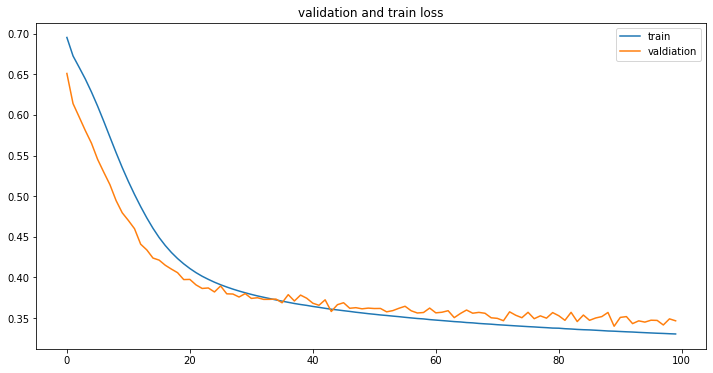

In [138]:
# visualizing losses and accuracy
train_loss = history.history['loss']
val_loss   = history.history['val_loss']
train_acc  = history.history['accuracy']
val_acc    = history.history['val_accuracy']
xc         = range(100)
plt.figure(figsize=(12, 6))
plt.plot(xc, train_loss, label="train")
plt.plot(xc, val_loss, label="valdiation")
plt.legend()
plt.title("validation and train loss")
plt.show()

In [139]:
y_hat_dev = model.predict(X_dev)
for i in range(len(y_hat_dev)):
  if y_hat_dev[i] >= 0.6:
    y_hat_dev[i]=1
  
  else:
    y_hat_dev[i]=0

y_hat_dev = y_hat_dev[:,0]

f1, pr, rec = score(y_dev, y_hat_dev)
print("f1-score is:", f1)
print("precision is:", pr)
print("recall is:", rec)


81/81 [==============================] - 0s 1ms/step
f1-score is: 0.6517857142857142
precision is: 0.5805168986083499
recall is: 0.7430025445292621


81/81 [==============================] - 0s 1ms/step


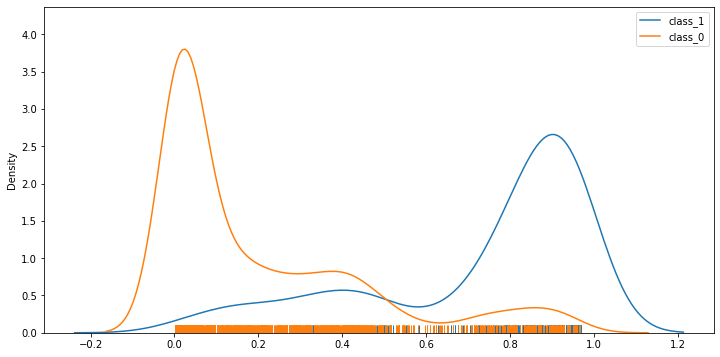

<Figure size 864x432 with 0 Axes>

In [140]:
y_hat = model.predict(X_dev)

y_hat_1 = y_hat[y_dev==1]
y_hat_0 = y_hat[y_dev==0]
#plt.hist([y_hat_1, y_hat_0], label=['1, 0'], bins=50, alpha=0.8)
#plt.legend(loc='upper right')
#plt.show()
#plt.xlabel("Predicted probability distribution")
plt.figure(figsize=(12, 6))
sns.distplot(y_hat_1, hist=False, rug=True, label="class_1")
sns.distplot(y_hat_0, hist=False, rug=True, label="class_0")
plt.legend()

plt.figure(figsize=(12, 6))
plt.show()

In [141]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 16)                352       
                                                                 
 dense_11 (Dense)            (None, 32)                544       
                                                                 
 dense_12 (Dense)            (None, 8)                 264       
                                                                 
 dense_13 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________


In [142]:
y_hat_test_nn = model.predict(X_test)

for i in range(len(y_hat_test_nn)):
  if y_hat_test_nn[i] >= 0.6:
    y_hat_test_nn[i]=1
  
  else:
   y_hat_test_nn[i]=0

y_hat_test_nn = y_hat_test_nn[:,0]

score(y_test, y_hat_test_nn)

35/35 [==============================] - 0s 1ms/step


(0.7031250000000001, 0.645933014354067, 0.7714285714285715)

In [135]:
accuracy(y_test, y_hat_test_nn)

0.8990990990990991